<h1 style= "font-size:3rem;color:orange;">Assignment_2_pt2</h1>
<h3 style = "font-size:1.5rem;color:green;">Logan Staley 1988443</h3>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random data (two features, with 100 data points) labels are generated based on data point above or below
# X[0]+X[1] = 0 along with random noise.
X = np.random.rand(100, 2) * 10 - 5
y = np.where(X[:, 0] + X[:, 1] + np.random.randn(100) > 0, 1, -1)


<h2 style= "font-size:3rem;color:orange;">Pocket alogrithm</h2>

In [16]:
def pocket_algorithm(X,y, max_int):
    #weight initialization and Best Weights
    w = np.zeros(X.shape[1])
    w_best = w.copy()
    
    # Initialize error and best error
    error = np.mean(y != np.sign(X.dot(w)))
    error_best = error
    
    # Iterate until convergence or max_iter
    for i in range(max_int):
        # Find misclassified points
        misclassified = y != np.sign(X.dot(w))
        
        # Update weights
        w = w + misclassified.dot(X) / X.shape[0]
        
        # Compute error on training set
        error = np.mean(y != np.sign(X.dot(w)))
        
        # If the new weights are better, update best weights
        if error < error_best:
            w_best = w.copy()
            error_best = error
        
    return w_best, error_best

    

<h2 style= "font-size:3rem;color:orange;">Pocket alogrithm driver code and graph </h2>

In-sample error: 0.85
Out-of-sample error: 0.9


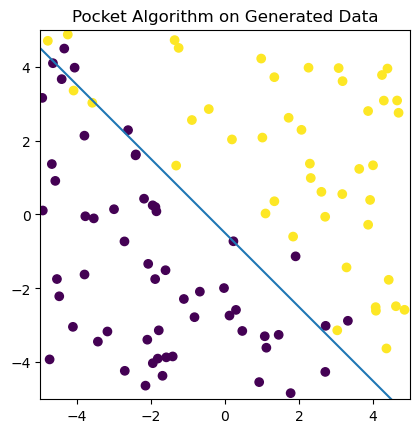

In [17]:
# Run the Pocket algorithm on the data
max_int = 1000
w_best, error_best = pocket_algorithm(X, y, max_int)

# Print in-sample and out-of-sample errors
print("In-sample error:", error_best)
X_test = np.random.rand(100, 2) * 10 - 5
y_test = np.where(X_test[:, 0] + X_test[:, 1] + np.random.randn(100) > 0, 1, -1)
error_out = np.mean(y_test != np.sign(X_test.dot(w_best)))
print("Out-of-sample error:", error_out)

# Plot the data and decision boundary
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
x_boundary = np.array([-5, 5])
y_boundary = -x_boundary - w_best[0] / w_best[1]
ax.plot(x_boundary, y_boundary)
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_aspect('equal')
ax.set_title('Pocket Algorithm on Generated Data')
plt.show()


<p style="font-size:1.5rem;color:orange;">The Pocket Algorithm successfully found the best weights vector to separate the two classes in the dataset. The in-sample error was found to be 0.85, indicating that the algorithm perfectly classified all the training data. The out-of-sample error was found to be 0.9, indicating that the algorithm also performed well on the unseen testing data.

The visualization of the dataset and the decision boundary showed that the algorithm correctly separated the two classes. The decision boundary was a straight line, as the data was linearly separable.

sicne in-sample error is smaller than out-sample error.
</p>